In [1]:
# Make better use of Jupyter Notebook cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the usual suspects. Any new functions will be introduced individually for clarity.
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter, OrderedDict

import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
%matplotlib inline

# make prettier plots
%config InlineBackend.figure_format = 'svg' 
sns.set()

In [20]:
# Load training and validation data
X_tr = pd.read_pickle('data/X_tr.pkl')
X_val = pd.read_pickle('data/X_val.pkl')

y_tr = pd.read_pickle('data/y_tr.pkl')
y_val = pd.read_pickle('data/y_val.pkl')

In [21]:
# get baseline logistic regression model:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_tr, y_tr)
f1 = f1_score(lr.predict(X_val), y_val)
recall = recall_score(lr.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.6483412322274882 
recall score: 0.6275229357798165


In [28]:
# get baseline random forest model
randomforest = RandomForestClassifier(n_estimators=1000)
randomforest.fit(X_tr, y_tr)
f1 = f1_score(randomforest.predict(X_val), y_val)
recall = recall_score(randomforest.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.9149952244508118 
recall score: 0.8919925512104283


In [23]:
# get baseline decision tree
decisiontree = DecisionTreeClassifier(max_depth=3)
decisiontree.fit(X_tr, y_tr)
f1 = f1_score(decisiontree.predict(X_val), y_val)
recall = recall_score(decisiontree.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.6613190730837789 
recall score: 0.6062091503267973


In [24]:
# get baseline linear svm
linearsvc = LinearSVC()
linearsvc.fit(X_tr, y_tr)
f1 = f1_score(linearsvc.predict(X_val), y_val)
recall = recall_score(linearsvc.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.6451612903225806 
recall score: 0.625


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [25]:
# get baseline svm
svc = SVC(gamma='scale', probability=True)
svc.fit(X_tr, y_tr)
f1 = f1_score(svc.predict(X_val), y_val)
recall = recall_score(svc.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7345844504021448 
recall score: 0.6748768472906403


In [26]:
# get baseline KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_tr, y_tr)
f1 = f1_score(knn.predict(X_val), y_val)
recall = recall_score(knn.predict(X_val), y_val)
print('f1 score: {} \nrecall score: {}'.format(f1, recall))

f1 score: 0.7429547395388558 
recall score: 0.6580937972768532


# ROC Curves

In [27]:
models = [lr, randomforest, decisiontree, svc, knn]

In [11]:
# fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])

ROC AUC score =  0.7100725221595487
ROC AUC score =  0.9689229116304057
ROC AUC score =  0.6695042400521852
ROC AUC score =  0.7950807720348414
ROC AUC score =  0.7750738651625033


Text(0.5, 1.0, 'ROC curve for Predicting Police Shootings')

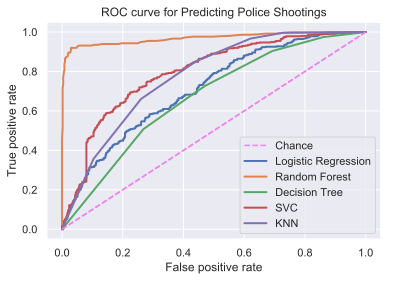

In [29]:
plt.plot([0,1],[0,1],c='violet',ls='--')
for model in models:
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    plt.plot(fpr, tpr,lw=2)

    print("ROC AUC score = ", roc_auc_score(y_val, model.predict_proba(X_val)[:,1]))

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(['Chance', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC', 'KNN'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Predicting Police Shootings')

In [19]:
for item in sorted(zip(list(X_tr.columns), list(randomforest.feature_importances_)), key=lambda x: x[1]):
    print(item)

('Pacific', 0.01037999863844279)
('FamilyWork', 0.01620177662674527)
('Native', 0.02760174428894871)
('WorkAtHome', 0.027935303849036367)
('OtherTransp', 0.02903102945636829)
('PublicWork', 0.029272035828442552)
('Transit', 0.02975482171405921)
('Carpool', 0.02987853575250872)
('Employed', 0.030483214997978528)
('IncomePerCap', 0.0305003265500246)
('Unemployment', 0.03086195143036757)
('Service', 0.031880569614481796)
('Production', 0.0320228639725885)
('Professional', 0.032083437095358845)
('Drive', 0.032355978458142004)
('VotingAgeCitizen', 0.03309272952610721)
('ChildPoverty', 0.03380304133508534)
('Black', 0.034466908161259864)
('Construction', 0.03471207927353083)
('Poverty', 0.03845315997954195)
('PrivateWork', 0.03847568071181924)
('Walk', 0.039082082634472555)
('White', 0.039855390077791396)
('Hispanic', 0.040659997777384646)
('MeanCommute', 0.04121164501924514)
('Asian', 0.045330547783021105)
('percent_men', 0.047620882039482317)
('SelfEmployed', 0.05545591652253314)
('Office'